In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv("train.csv")
print(df.shape)
df.head(20000)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
test = pd.read_csv("test.csv")
print(test.shape)

ID_column_test = test.iloc[:,0].copy()

(1459, 80)


In [77]:
test["Id"]

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [78]:
X = df.drop(columns=['SalePrice', 'Id'])
y = df['SalePrice']
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

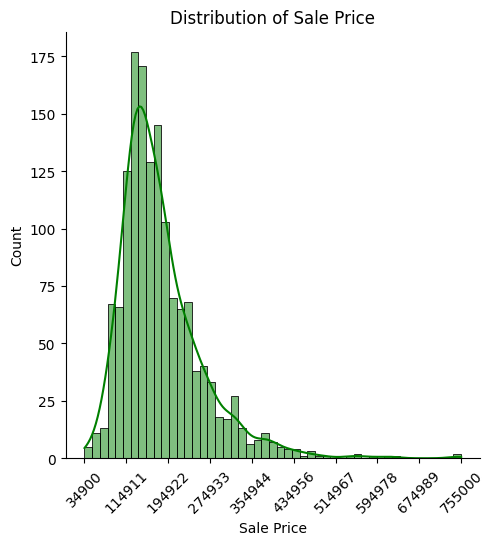

In [80]:
sns.displot(df, x="SalePrice", color='g', kde=True)

plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')

plt.xticks(ticks=np.linspace(df["SalePrice"].min(), df["SalePrice"].max(), num=10), rotation=45)

plt.show()

In [ ]:
'''from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class DropIdColumn(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.drop(columns=['Id'])

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


pipeline = Pipeline(steps=[('drop_id', DropIdColumn()), ('onehot', ColumnTransformer(transformers=[('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)], 
                    remainder='passthrough'))  # Keep the remaining columns
                    ])

transformed_X = pipeline.fit_transform(X)

transformed_X = pd.DataFrame(transformed_X, columns=pipeline.named_steps['onehot'].get_feature_names_out())

print(transformed_X)'''

In [81]:
joined_dataset = pd.concat([X, test], axis = 0)
categorical_cols = joined_dataset.select_dtypes(include=['object']).columns.tolist()
numerical_cols = joined_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
joined_dataset.head(2000000)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Id
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,NaN
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,NaN
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,NaN
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,2915.0
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,2916.0
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,2917.0
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,2918.0


In [82]:
len(numerical_cols) + len(categorical_cols)

80

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

'''numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

pipeline = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols),
                            ('cat', categorical_transformer, categorical_cols)])'''

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

'''pipeline = Pipeline(steps=[('preprocessor', ColumnTransformer(transformers=[('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols),
            ('num', StandardScaler(), numerical_cols)], remainder='passthrough'))])  # Keep the remaining columns'''

'''pipeline = Pipeline(steps=[('onehot', ColumnTransformer(transformers=[('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)], 
                    remainder='passthrough'))  # Keep the remaining columns
                    ])'''

joint_X = preprocessor.fit_transform(joined_dataset)

#joint_X = pd.DataFrame(joint_X, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

print(joint_X)

  (0, 0)	0.06733141428819403
  (0, 1)	-0.19181473342694602
  (0, 2)	-0.2178786924659806
  (0, 3)	0.6461833962946006
  (0, 4)	-0.5072842015265535
  (0, 5)	1.0462575960103884
  (0, 6)	0.896832928430717
  (0, 7)	0.5290341666924494
  (0, 8)	0.580959154034753
  (0, 9)	-0.2930252797528886
  (0, 10)	-0.9347821341758334
  (0, 11)	-0.4442778364288438
  (0, 12)	-0.7738610250965184
  (0, 13)	1.2073785497461735
  (0, 14)	-0.10119701650206231
  (0, 15)	0.4135472163019127
  (0, 16)	1.0873340846696231
  (0, 17)	-0.24971861037228732
  (0, 18)	0.7813658143509358
  (0, 19)	1.2325988725051025
  (0, 20)	0.16992708860002484
  (0, 21)	-0.20769847452544338
  (0, 22)	0.986849366836289
  (0, 23)	-0.9243112113157019
  (0, 24)	0.9989537078068311
  :	:
  (2918, 170)	1.0
  (2918, 175)	1.0
  (2918, 178)	1.0
  (2918, 184)	1.0
  (2918, 189)	1.0
  (2918, 190)	1.0
  (2918, 197)	1.0
  (2918, 205)	1.0
  (2918, 207)	1.0
  (2918, 212)	1.0
  (2918, 218)	1.0
  (2918, 223)	1.0
  (2918, 227)	1.0
  (2918, 234)	1.0
  (2918, 239)

In [84]:
type(joint_X)

scipy.sparse._csr.csr_matrix

In [85]:
train = joint_X[0:1460,:]
test = joint_X[1460:2919,:]

In [139]:
train_final = train.toarray()
test_final = test.toarray()

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=7)
rnd_clf.fit(train, y)

In [ ]:
y_pred = rnd_clf.predict(train)

In [ ]:
y.values

In [ ]:
y_pred

In [ ]:
rnd_clf.score(train, y)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

grid_search = RandomizedSearchCV(estimator=rnd_clf, param_distributions=param_dist, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(train, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
y_final = rnd_clf.predict(test)
y_final

In [ ]:
y_df = pd.DataFrame(y_final, columns=['SalePrice'])
y_submit = pd.concat([ID_column_test, y_df], axis=1)

In [ ]:
y_submit

In [ ]:
y_submit.to_csv('submission4.csv', index=False)

## XG Boost

In [ ]:
import xgboost
xgb_reg = xgboost.XGBRegressor(eta= 0.25, n_estimators = 200)
xgb_reg.fit(train, y)


In [ ]:
y_pred = xgb_reg.predict(train)

In [ ]:
y.values

In [ ]:
y_pred

In [ ]:
xgb_reg.score(train, y)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'eta': [0.2, 0.25, 0.3, 0.35],
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 5, 7, 10, 12],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

# Fit the model
grid_search.fit(train, y)

# Best parameters
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
y_final = xgb_reg.predict(test)
y_final

In [ ]:
y_df = pd.DataFrame(y_final, columns=['SalePrice'])
y_submit = pd.concat([ID_column_test, y_df], axis=1)

In [ ]:
y_submit.to_csv('submission14.csv', index=False)

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=250)
rnd_reg.fit(train, y)

In [ ]:
y_pred = rnd_reg.predict(train)

In [ ]:
y.values

In [ ]:
y_pred

In [ ]:
rnd_reg.score(train, y)

In [ ]:
y_final = rnd_reg.predict(test)
y_final

In [ ]:
y_df = pd.DataFrame(y_final, columns=['SalePrice'])
y_submit = pd.concat([ID_column_test, y_df], axis=1)

In [ ]:
y_submit.to_csv('submission14.csv', index=False)

## HistGradient Boosting Regressor

In [196]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(learning_rate=0.13999999, random_state=42)

hgb.fit(train_final, y)

HistGradientBoostingRegressor(learning_rate=0.13999999, random_state=42)

In [197]:
y_pred = hgb.predict(train_final)

In [198]:
y.values

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [199]:
y_pred

array([204518.56608598, 179212.26033446, 223070.93046603, ...,
       268646.41935659, 142002.26603002, 146490.611712  ])

In [200]:
hgb.score(train_final, y)

0.988070700682838

In [201]:
y_final = hgb.predict(test_final)
y_final

array([127296.62695888, 151124.74233327, 174396.90797954, ...,
       153015.67040949, 114682.65855995, 204292.2989446 ])

In [202]:
y_df = pd.DataFrame(y_final, columns=['SalePrice'])
y_submit = pd.concat([ID_column_test, y_df], axis=1)

In [203]:
y_submit.to_csv('submission30.csv', index=False)

## Deep Learning

In [87]:
ID_column_test

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

Epoch 1/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 39041650688.0000 - val_loss: 32143581184.0000
Epoch 2/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 18821351424.0000 - val_loss: 2902321664.0000
Epoch 3/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1407795968.0000 - val_loss: 2382298112.0000
Epoch 4/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1188401408.0000 - val_loss: 2225049344.0000
Epoch 5/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 877533696.0000 - val_loss: 2266526976.0000
Epoch 6/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 977085312.0000 - val_loss: 2229082368.0000
Epoch 7/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 856814144.0000 - val_loss: 2176226560.0000
Epoch 8/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 732944000.0000 - val_loss: 2133825664.0000
Epoch 9/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 670133120.0000 - val_loss: 2134628224.0000
Epoch 10/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 86482

<Axes: >

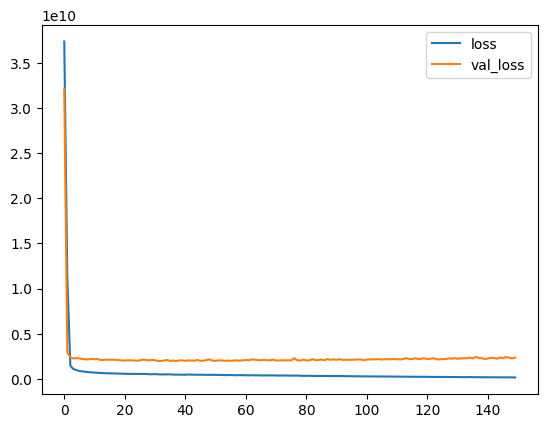

In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout

model = Sequential([Input(shape=(train.shape[1],)),
                    Dense(300, activation='relu'),
                    Dense(2048, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(1, activation='linear')
                ])

model.compile(optimizer= "adam", loss='mean_squared_error')

history = model.fit(train, y, epochs=150, validation_split=0.2, batch_size=30)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

In [120]:
type(train)

scipy.sparse._csr.csr_matrix

In [121]:
type(y)

pandas.core.series.Series

In [122]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [126]:
predicted_values = model.predict(test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [127]:
predicted_values

array([[134022.1 ],
       [141960.66],
       [184533.97],
       ...,
       [171056.81],
       [119677.17],
       [211099.33]], dtype=float32)

In [125]:
model.evaluate(train, y, verbose=1)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181604736.0000


550115392.0

In [128]:
y_df = pd.DataFrame(predicted_values, columns=['SalePrice'])
y_submit = pd.concat([ID_column_test, y_df], axis=1)

In [129]:
y_submit.to_csv('submission26.csv', index=False)